# Initializing graph

1 is Citadel and it's considered as Shelter

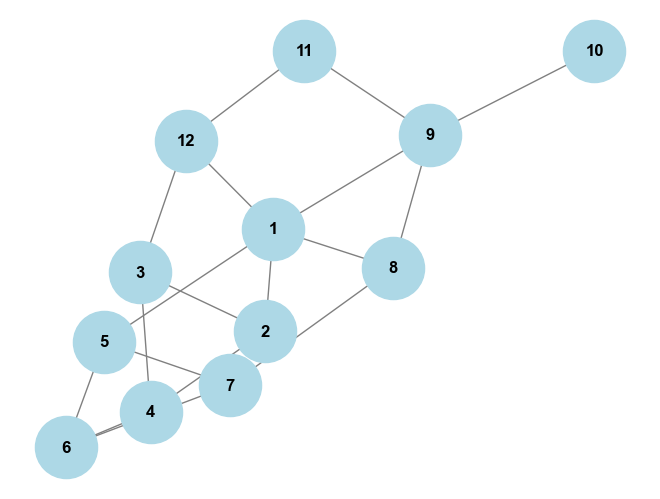

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

G.add_edges_from([(1, 2), (1, 5), (1, 8), (1, 9), (1, 12)])
G.add_edges_from([(2, 1), (2, 3), (2, 4)])
G.add_edges_from([(3, 2), (3, 4), (3, 12)])
G.add_edges_from([(4, 2), (4, 3), (4, 6)])
G.add_edges_from([(5, 1), (5, 6), (5, 7)])
G.add_edges_from([(6, 4), (6, 5), (6, 7)])
G.add_edges_from([(7, 5), (7, 6), (7, 8)])
G.add_edges_from([(8, 1), (8, 7), (8, 9)])
G.add_edges_from([(9, 1), (9, 8), (9, 10), (9, 11)])
G.add_edges_from([(10, 9)])
G.add_edges_from([(11, 9), (11, 12)])
G.add_edges_from([(12, 1), (12, 3), (12,11)])

nx.draw(G, with_labels=True, node_color='lightblue', node_size=2000, font_size=12, font_weight='bold', edge_color='gray')

plt.show()

# Output of one graph

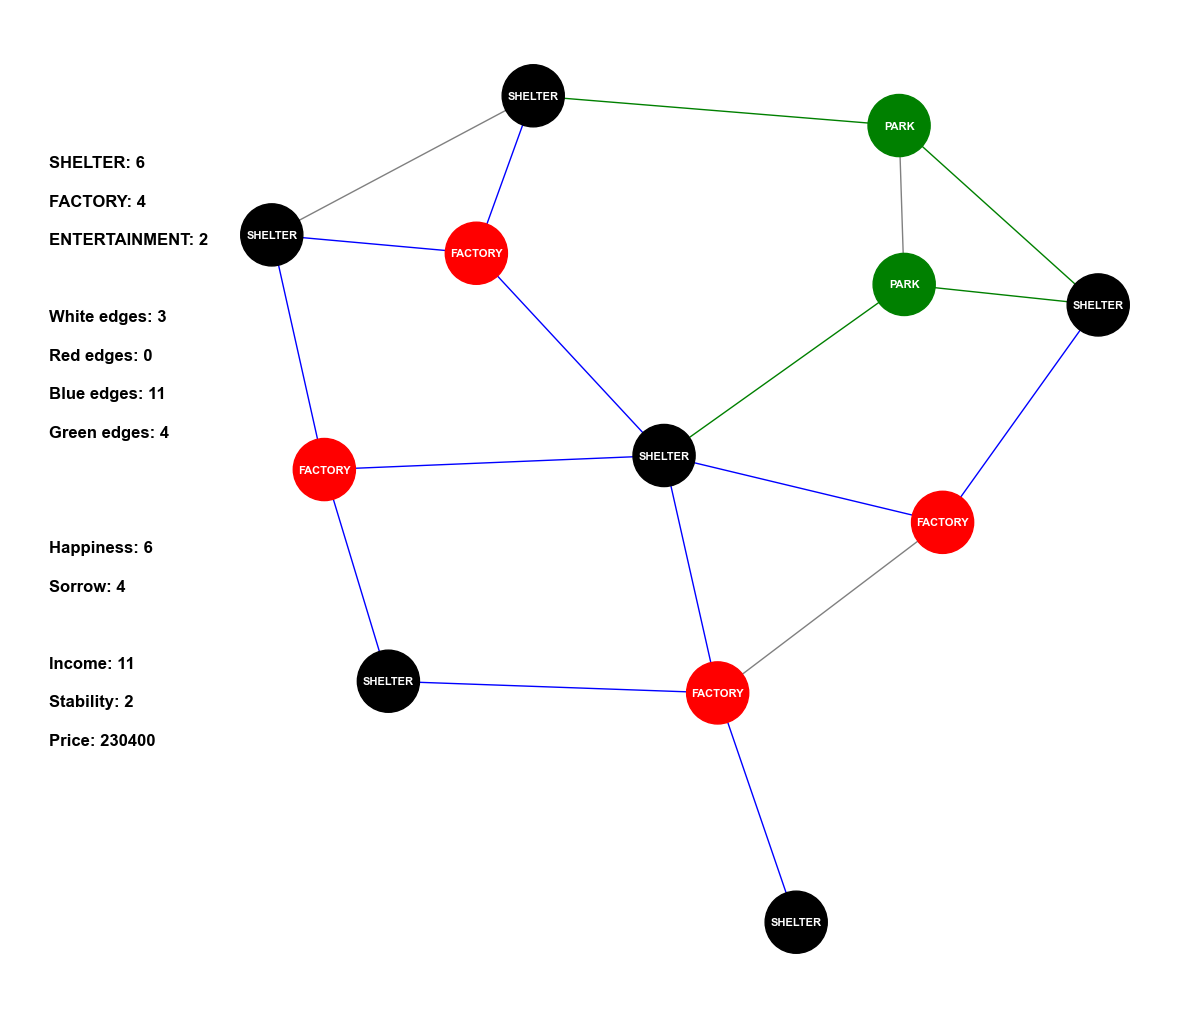

In [30]:

# 0 - SHELTER
# 1 - FACTORY
# 2 - ENTERTAINMENT
weights = {
    1: 0,2: 1,3: 0,4: 0,
    5: 2,6: 2,7: 0,8: 1,  
    9: 1,10: 0,11: 0,12: 1
}

for node, weight in weights.items():
    G.nodes[node]['weight'] = weight

node_labels = {node: ('SHELTER' if weight == 0 else 'FACTORY' if weight == 1 else 'PARK') for node, weight in weights.items()}

node_colors = ['black' if G.nodes[node]['weight'] == 0 else 
               'red' if G.nodes[node]['weight'] == 1 else 
               'green' for node in G.nodes]

edge_colors = []
edge_statistics = {'grey': 0, 'red': 0, 'blue': 0, 'green': 0}  # Статистика рёбер
for u, v in G.edges():
    weight_u = G.nodes[u]['weight']
    weight_v = G.nodes[v]['weight']
    
    # WHITE (SHELTER-SHELTER, FACTORY-FACTORY, ENTERTAINMENT-ENTERTAINMENT)
    if weight_u == weight_v:
        if weight_u == 0:  # SHELTER-SHELTER
            edge_colors.append('grey')
            edge_statistics['grey'] += 1
        elif weight_u == 1:  # FACTORY-FACTORY
            edge_colors.append('grey')
            edge_statistics['grey'] += 1
        elif weight_u == 2:  # ENTERTAINMENT-ENTERTAINMENT
            edge_colors.append('grey')
            edge_statistics['grey'] += 1
    
    # RED (FACTORY-ENTERTAINMENT, ENTERTAINMENT-FACTORY)
    elif (weight_u == 1 and weight_v == 2) or (weight_u == 2 and weight_v == 1):
        edge_colors.append('red')
        edge_statistics['red'] += 1
    
    # BLUE (SHELTER-FACTORY, FACTORY-SHELTER)
    elif (weight_u == 0 and weight_v == 1) or (weight_u == 1 and weight_v == 0):
        edge_colors.append('blue')
        edge_statistics['blue'] += 1
    
    # GREEN (SHELTER-ENTERTAINMENT, ENTERTAINMENT-SHELTER)
    elif (weight_u == 0 and weight_v == 2) or (weight_u == 2 and weight_v == 0):
        edge_colors.append('green')
        edge_statistics['green'] += 1
   
   
# STATISTICS
node_statistics = {'SHELTER': sum(1 for weight in weights.values() if weight == 0),
                   'FACTORY': sum(1 for weight in weights.values() if weight == 1),
                   'ENTERTAINMENT': sum(1 for weight in weights.values() if weight == 2)}

    
# PLOT
fig, ax = plt.subplots(figsize=(10, 10))

ax.text(0.05, 0.95, f"SHELTER: {node_statistics['SHELTER']}", transform=ax.transAxes, fontsize=12, fontweight='bold', color='black')
ax.text(0.05, 0.90, f"FACTORY: {node_statistics['FACTORY']}", transform=ax.transAxes, fontsize=12, fontweight='bold', color='black')
ax.text(0.05, 0.85, f"ENTERTAINMENT: {node_statistics['ENTERTAINMENT']}", transform=ax.transAxes, fontsize=12, fontweight='bold', color='black')

ax.text(0.05, 0.75, f"White edges: {edge_statistics['grey']}", transform=ax.transAxes, fontsize=12, fontweight='bold', color='black')
ax.text(0.05, 0.70, f"Red edges: {edge_statistics['red']}", transform=ax.transAxes, fontsize=12, fontweight='bold', color='black')
ax.text(0.05, 0.65, f"Blue edges: {edge_statistics['blue']}", transform=ax.transAxes, fontsize=12, fontweight='bold', color='black')
ax.text(0.05, 0.60, f"Green edges: {edge_statistics['green']}", transform=ax.transAxes, fontsize=12, fontweight='bold', color='black')

happiness = edge_statistics['green'] + node_statistics['ENTERTAINMENT']
sorrow = edge_statistics['red'] + node_statistics['FACTORY']
income = edge_statistics['blue']
stability = happiness - sorrow

# PRICE FROM GAME WIKI
price = 25600*(node_statistics['SHELTER']-1) + 19200*node_statistics['FACTORY'] + 12800*node_statistics['ENTERTAINMENT']

ax.text(0.05, 0.45, f"Happiness: {happiness}", transform=ax.transAxes, fontsize=12, fontweight='bold', color='black')
ax.text(0.05, 0.40, f"Sorrow: {sorrow}", transform=ax.transAxes, fontsize=12, fontweight='bold', color='black')
ax.text(0.05, 0.30, f"Income: {income}", transform=ax.transAxes, fontsize=12, fontweight='bold', color='black')
ax.text(0.05, 0.25, f"Stability: {stability}", transform=ax.transAxes, fontsize=12, fontweight='bold', color='black')
ax.text(0.05, 0.20, f"Price: {price}", transform=ax.transAxes, fontsize=12, fontweight='bold', color='black')

ax.set_axis_off()

ax_graph = fig.add_axes([0.3, 0.0, 1.0, 1.0])  

pos = nx.spring_layout(G) 
nx.draw(G, pos, with_labels=False, node_color=node_colors, node_size=2000, edge_color=edge_colors, font_size=12)

nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=8, font_weight='bold', font_color='white')

plt.show()

# Save table of every possible combinations

In [2]:
import pandas as pd
import itertools

possible_weights = [0, 1, 2]
combinations = itertools.product(possible_weights, repeat=12)


def calculate_statistics(weights_combination):
    
    # FOR ALL NODES
    for i, node in enumerate(range(1, 13)):
        G.nodes[node]['weight'] = weights_combination[i]

    # EDGE STATISTICS
    edge_colors = []
    edge_statistics = {'grey': 0, 'red': 0, 'blue': 0, 'green': 0}
    for u, v in G.edges():
        weight_u = G.nodes[u]['weight']
        weight_v = G.nodes[v]['weight']
        if weight_u == weight_v:
            if weight_u == 0:  # SHELTER-SHELTER
                edge_colors.append('grey')
                edge_statistics['grey'] += 1
            elif weight_u == 1:  # FACTORY-FACTORY
                edge_colors.append('grey')
                edge_statistics['grey'] += 1
            elif weight_u == 2:  # ENTERTAINMENT-ENTERTAINMENT
                edge_colors.append('grey')
                edge_statistics['grey'] += 1
        elif (weight_u == 1 and weight_v == 2) or (weight_u == 2 and weight_v == 1):  # FACTORY-ENTERTAINMENT
            edge_colors.append('red')
            edge_statistics['red'] += 1
        elif (weight_u == 0 and weight_v == 1) or (weight_u == 1 and weight_v == 0):  # SHELTER-FACTORY
            edge_colors.append('blue')
            edge_statistics['blue'] += 1
        elif (weight_u == 0 and weight_v == 2) or (weight_u == 2 and weight_v == 0):  # SHELTER-ENTERTAINMENT
            edge_colors.append('green')
            edge_statistics['green'] += 1

    # NODE STATISTICS
    node_statistics = {'SHELTER': sum(1 for weight in weights_combination if weight == 0),
                       'FACTORY': sum(1 for weight in weights_combination if weight == 1),
                       'ENTERTAINMENT': sum(1 for weight in weights_combination if weight == 2)}

    # PRICE FROM WIKI
    happiness = edge_statistics['green'] + node_statistics['ENTERTAINMENT']
    sorrow = edge_statistics['red'] + node_statistics['FACTORY']
    income = edge_statistics['blue']
    stability = happiness - sorrow
    price = 25600*(node_statistics['SHELTER']-1) + 19200*node_statistics['FACTORY'] + 12800*node_statistics['ENTERTAINMENT']

    return {
        'White': edge_statistics['grey'],
        'Red': edge_statistics['red'],
        'Blue': edge_statistics['blue'],
        'Green': edge_statistics['green'],
        'Happiness': happiness,
        'Sorrow': sorrow,
        'Income': income,
        'Stability': stability,
        'Price': price
        
    }


results = []

count = 0
for combination in combinations:
    count += 1
    if count%5000 == 0:
        print('Percent: ', 100*count/3**12)
    stats = calculate_statistics(combination)
    results.append(dict(zip([str(i) for i in range(1, 13)], combination), **stats))

df = pd.DataFrame(results)

print('Save DataFrame in csv')
df.to_csv('graph_statistics.csv', index=False)


Percent:  0.9408382115794603
Percent:  1.8816764231589207
Percent:  2.822514634738381
Percent:  3.7633528463178414
Percent:  4.704191057897302
Percent:  5.645029269476762
Percent:  6.585867481056223
Percent:  7.526705692635683
Percent:  8.467543904215143
Percent:  9.408382115794604
Percent:  10.349220327374065
Percent:  11.290058538953524
Percent:  12.230896750532985
Percent:  13.171734962112446
Percent:  14.112573173691906
Percent:  15.053411385271366
Percent:  15.994249596850826
Percent:  16.935087808430286
Percent:  17.875926020009747
Percent:  18.816764231589207
Percent:  19.75760244316867
Percent:  20.69844065474813
Percent:  21.63927886632759
Percent:  22.580117077907047
Percent:  23.52095528948651
Percent:  24.46179350106597
Percent:  25.40263171264543
Percent:  26.34346992422489
Percent:  27.284308135804352
Percent:  28.225146347383813
Percent:  29.16598455896327
Percent:  30.10682277054273
Percent:  31.047660982122192
Percent:  31.988499193701653
Percent:  32.92933740528111
Pe

# Income prediction (Random forest)

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

percentages = [1,2,3,4,5,6,7,8,9, 
               10,11,12,13,14,15,16,17,18,19, 
               20,21,22,23,24,25,26,27,28,29,
               50, 100]

mse_list = []
mae_list = []
r2_list = []

data = pd.read_csv("graph_statistics.csv")

for percent in percentages:
    print (percent)
    sample_size = int(len(data) * percent / 100)
    
    sample_data = data.sample(n=sample_size, random_state=42)
    
    X_sample = sample_data.iloc[:, :-1]
    y_sample = sample_data['Income']
    
    X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)
    
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    mse_list.append(mse)
    mae_list.append(mae)
    r2_list.append(r2)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
50
100


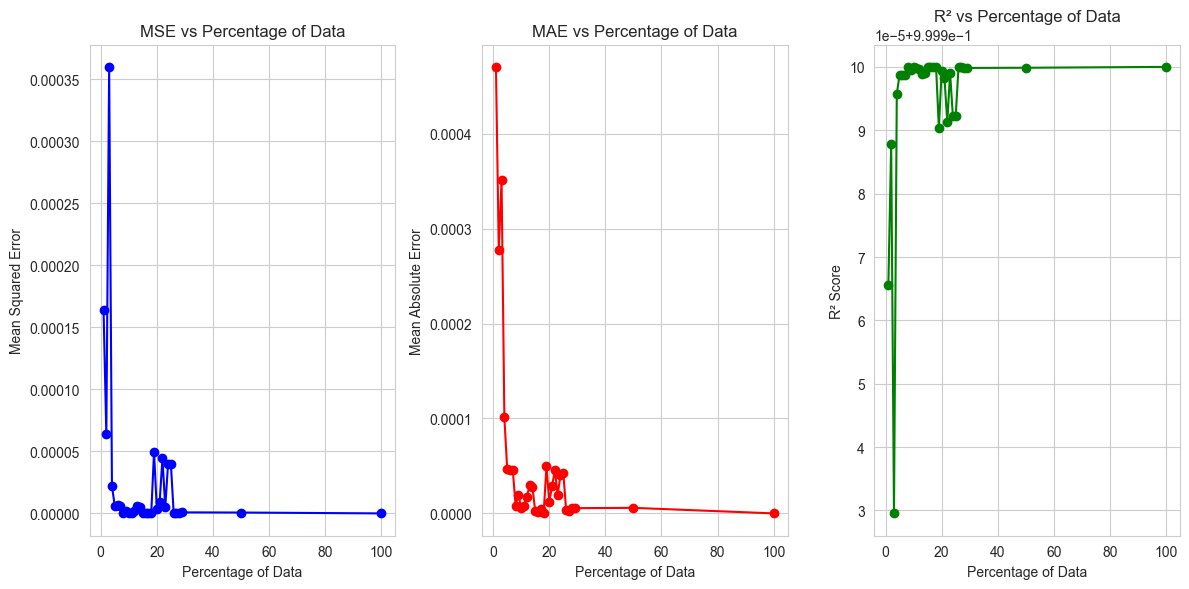

In [13]:
plt.figure(figsize=(12, 6))

# MSE
plt.subplot(1, 3, 1)
plt.plot(percentages, mse_list, marker='o', linestyle='-', color='b')
plt.title('MSE vs Percentage of Data')
plt.xlabel('Percentage of Data')
plt.ylabel('Mean Squared Error')

# MAE
plt.subplot(1, 3, 2)
plt.plot(percentages, mae_list, marker='o', linestyle='-', color='r')
plt.title('MAE vs Percentage of Data')
plt.xlabel('Percentage of Data')
plt.ylabel('Mean Absolute Error')

# R²
plt.subplot(1, 3, 3)
plt.plot(percentages, r2_list, marker='o', linestyle='-', color='g')
plt.title('R² vs Percentage of Data')
plt.xlabel('Percentage of Data')
plt.ylabel('R² Score')

plt.tight_layout()
plt.show()

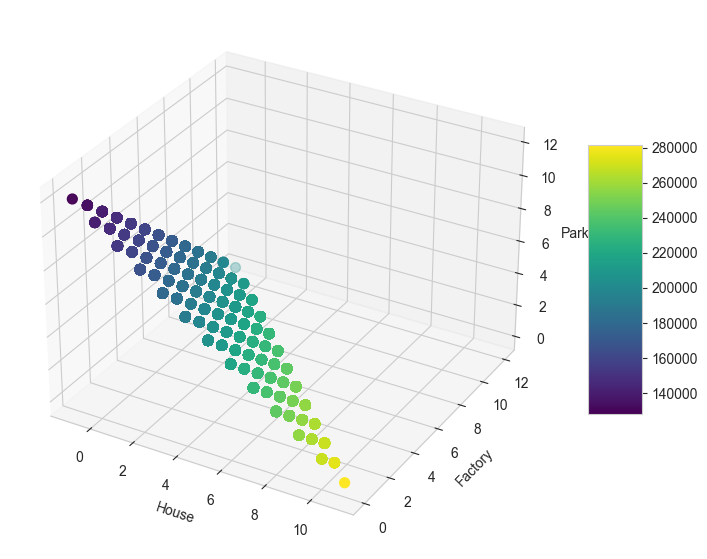

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

data = pd.read_csv("graph_statistics.csv")

house = (data.iloc[:, :12] == 0).sum(axis=1)-1  # count 0 (house), node 0 is free
factory = (data.iloc[:, :12] == 1).sum(axis=1)  # count 1 (factory)
park = (data.iloc[:, :12] == 2).sum(axis=1)  # count 2 (park)

price = data['Price']

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(house, factory, park, c=price, cmap='viridis', s=50)

ax.set_xlabel('House')
ax.set_ylabel('Factory')
ax.set_zlabel('Park')

fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=5)

plt.show()


In [15]:
import pandas as pd
from sklearn.linear_model import LinearRegression

data = pd.read_csv("graph_statistics.csv")

house = (data.iloc[:, :12] == 0).sum(axis=1)-1 
factory = (data.iloc[:, :12] == 1).sum(axis=1)  
park = (data.iloc[:, :12] == 2).sum(axis=1)  

price = data['Price']

X = pd.DataFrame({'house': house, 'factory': factory, 'park': park})

model = LinearRegression(fit_intercept=False)

model.fit(X, price)

coefficients = model.coef_
intercept = model.intercept_

print(f"Coefficient of x*house + y*factory + z*park = price:")
print(f"Coefficient for house (x): {coefficients[0]}")
print(f"Coefficient for factory (y): {coefficients[1]}")
print(f"Coefficient for park (z): {coefficients[2]}")


Coefficient of x*house + y*factory + z*park = price:
Coefficient for house (x): 25599.99999999508
Coefficient for factory (y): 19199.99999999955
Coefficient for park (z): 12800.000000006074


In [18]:
import pandas as pd
from sklearn.linear_model import LinearRegression

data = pd.read_csv("graph_statistics.csv")

house = (data.iloc[:, :12] == 0).sum(axis=1)-1 
factory = (data.iloc[:, :12] == 1).sum(axis=1) 
park = (data.iloc[:, :12] == 2).sum(axis=1) 

price = data['Price']

X = pd.DataFrame({'house': house, 'factory': factory, 'park': park})

model = LinearRegression()

model.fit(X, price)

coefficients = model.coef_
intercept = model.intercept_

print(f"Coefficient of x*house + y*factory + z*park + intercept = price:")
print(f"Coefficient for house (x): {coefficients[0]}")
print(f"Coefficient for factory (y): {coefficients[1]}")
print(f"Coefficient for park (z): {coefficients[2]}")
print(f"Coefficient for start capital (intercept): {intercept}")

Coefficient of x*house + y*factory + z*park + intercept = price:
Coefficient for house (x): 18361.782661257836
Coefficient for factory (y): 11961.782661257828
Coefficient for park (z): 5561.782661257829
Coefficient for start capital (intercept): 79620.39072616387
